<a href="https://colab.research.google.com/github/kesavan1994/Customer_convertion_prediction/blob/main/Main_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing data set from github
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/kesavan1994/ML-Dataset/main/Customer_convertion_Pred_train.csv")
# df2=pd.read_csv("/content/Customer_convertion_Pred_train.csv")

In [ ]:
import os
os.getcwd()


'/content'

In [ ]:
df.iloc[0:5,:]


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.shape

(45211, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
df.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

**Data Cleaning**

In [ ]:

df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
df.shape[0]

45211

In [ ]:
df['education_qual'].nunique()

4

In [ ]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [ ]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
print("Highest allowed",df['dur'].mean() + 3*df['dur'].std())
print("Lowest allowed",df['dur'].mean() - 3*df['dur'].std())
print("Highest allowed",df['num_calls'].mean() + 3*df['num_calls'].std())
print("Lowest allowed",df['num_calls'].mean() - 3*df['num_calls'].std())
print("Highest allowed",df['age'].mean() + 3*df['age'].std())
print("Lowest allowed",df['age'].mean() - 3*df['age'].std())

Highest allowed 1030.746516576985
Lowest allowed -514.4203570140467
Highest allowed 12.057903308084395
Lowest allowed -6.530221991590622
Highest allowed 72.79249633725463
Lowest allowed 9.079924091402106


In [ ]:
df['dur'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [ ]:
# df[(df['dur'] > 1030.74) | (df['dur'] < -514.4203570140467)]
new_df = df[(df['dur'] > 1030.74) | (df['dur'] < -514.4203570140467)]

In [ ]:
upper_limit = df['dur'].mean() + 3*df['dur'].std()
lower_limit = df['dur'].mean() - 3*df['dur'].std()

In [ ]:
import numpy as np

df['dur'] = np.where(
    df['dur']>upper_limit,
    upper_limit,
    np.where(
        df['dur']<lower_limit,
        lower_limit,
        df['dur']))

In [ ]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df['dur'].describe()

count    45211.000000
mean       250.772487
std        220.986371
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       1030.746517
Name: dur, dtype: float64

In [ ]:
df['num_calls'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [ ]:
new_df = df[(df['num_calls'] > 72) | (df['num_calls'] < 9)]

upper_limit = df['num_calls'].mean() + 3*df['num_calls'].std()
lower_limit = df['num_calls'].mean() - 3*df['num_calls'].std()

import numpy as np

df['num_calls'] = np.where(
    df['num_calls']>upper_limit,
    upper_limit,
    np.where(
        df['num_calls']<lower_limit,
        lower_limit,
        df['num_calls']))


In [ ]:
df['num_calls'].describe()

count    45211.000000
mean         2.632957
std          2.319295
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         12.057903
Name: num_calls, dtype: float64

In [ ]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:

# upper_limit = df['age'].mean() + 3*df['age'].std()
# lower_limit = df['age'].mean() - 3*df['age'].std()

# import numpy as np

# df['age'] = np.where(
#     df['age']>upper_limit,
#     upper_limit,
#     np.where(
#         df['age']<lower_limit,
#         lower_limit,
#         df['age']))

In [ ]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
# label encoding yes as 1 no as 0 y column
mapping={'yes':1,'no':0}
df['Target']=df['y'].replace(mapping)

In [ ]:
df['Target'].value_counts()


0    39922
1     5289
Name: Target, dtype: int64

In [ ]:
df.groupby(['job'])['Target'].mean().sort_values(ascending=False)

job
student          0.286780
retired          0.227915
unemployed       0.155027
management       0.137556
admin.           0.122027
self-employed    0.118429
unknown          0.118056
technician       0.110570
services         0.088830
housemaid        0.087903
entrepreneur     0.082717
blue-collar      0.072750
Name: Target, dtype: float64

In [ ]:
df.groupby(['marital'])['Target'].mean().sort_values(ascending=False)

marital
single      0.149492
divorced    0.119455
married     0.101235
Name: Target, dtype: float64

In [ ]:
df.groupby(['education_qual'])['Target'].mean().sort_values(ascending=False)

education_qual
tertiary     0.150064
unknown      0.135703
secondary    0.105594
primary      0.086265
Name: Target, dtype: float64

<AxesSubplot:>

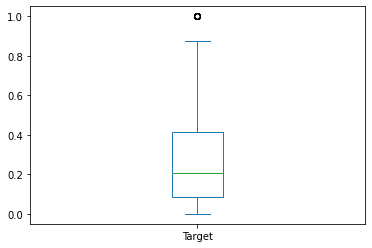

In [ ]:
(df.groupby('dur')['Target'].mean()).sort_values(ascending=False).plot(kind='box')

In [ ]:
df.groupby(['call_type'])['Target'].mean().sort_values(ascending=False)

call_type
cellular     0.149189
telephone    0.134205
unknown      0.040707
Name: Target, dtype: float64

In [ ]:
df.groupby(['mon'])['Target'].mean().sort_values(ascending=False)

mon
mar    0.519916
dec    0.467290
sep    0.464594
oct    0.437669
apr    0.196794
feb    0.166478
aug    0.110133
jun    0.102228
nov    0.101511
jan    0.101212
jul    0.090935
may    0.067195
Name: Target, dtype: float64

In [ ]:
df.groupby(['num_calls'])['Target'].mean().sort_values(ascending=False)

num_calls
1.000000     0.145976
2.000000     0.112035
3.000000     0.111936
4.000000     0.090006
11.000000    0.079602
5.000000     0.078798
6.000000     0.071263
9.000000     0.064220
7.000000     0.063946
8.000000     0.059259
10.000000    0.052632
12.057903    0.032143
12.000000    0.025806
Name: Target, dtype: float64

In [ ]:
df['job'].mode()[0]

'blue-collar'

In [ ]:
import numpy as np
df['job']=df['job'].replace('unknown',df['job'].mode()[0])

In [ ]:
# df['job']=df['job'].fillna('blue-collar')

In [ ]:
df['education_qual'].mode()

0    secondary
dtype: object

In [ ]:
import numpy as np
df['education_qual']=df['education_qual'].replace('unknown',df['education_qual'].mode()[0])

In [ ]:
# df['education_qual']=df['education_qual'].fillna('secondary')

 **Exploratory Data analyst**

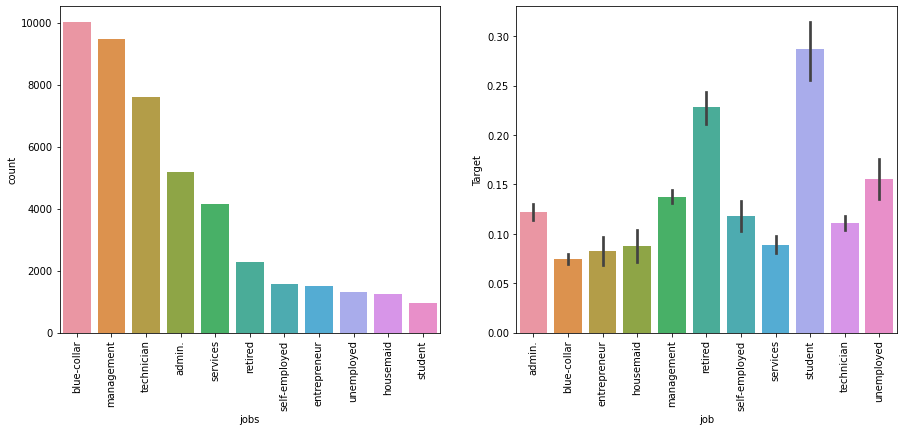

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,6))
df_j=pd.DataFrame(df.job.value_counts()).sort_values('job',ascending=False).reset_index()
df_j.rename(columns={'index':'jobs','job':'count'},inplace=True)
bar=sns.barplot(x=df_j['jobs'],y=df_j['count'],data=df_j,ax = ax[0])
bar.tick_params(axis='x',rotation=90)

df.groupby('job')['Target'].mean().sort_values(ascending=True)
bar=sns.barplot(x=df['job'].sort_values(),y='Target',data=df,ax = ax[1])
bar.tick_params(axis='x',rotation=90)

<AxesSubplot:ylabel='job'>

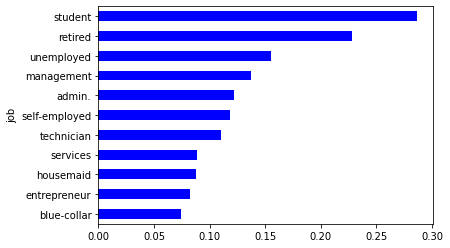

In [ ]:
df.groupby(['job'])['Target'].mean().sort_values().plot(kind='barh',color='blue')

In [ ]:
job={'student':10,'retired':9,'unemployed':8,'management':7,'admin.':6,'self-employed':5,'technician':4,'services':3,'housemaid':2,'entrepreneur':1,'blue-collar':0}
df['job'].replace(job,inplace=True)


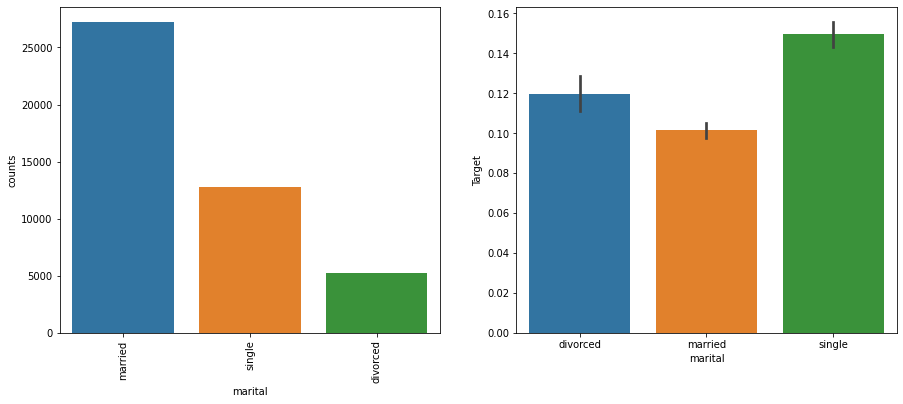

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,6))
df_m=pd.DataFrame(df.marital.value_counts()).sort_values('marital',ascending=False).reset_index()
df_m.rename(columns={'index':'marital','marital':'counts'},inplace=True)
bar=sns.barplot(x=df_m['marital'],y=df_m['counts'],data=df_m,ax = ax[0])
bar.tick_params(axis='x',rotation=90)

df.groupby('marital')['Target'].mean().sort_values(ascending=False)
bar=sns.barplot(x=df['marital'].sort_values(),y='Target',data=df,ax = ax[1])


<AxesSubplot:ylabel='marital'>

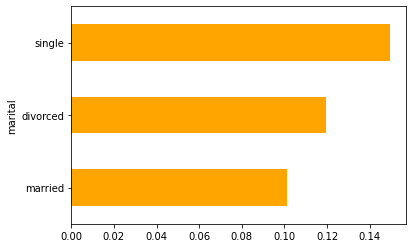

In [ ]:
df.groupby(['marital'])['Target'].mean().sort_values().plot(kind='barh',color='orange')

In [ ]:
mar={'single':2,'divorced':1,'married':0}
df['marital'].replace(mar,inplace=True)

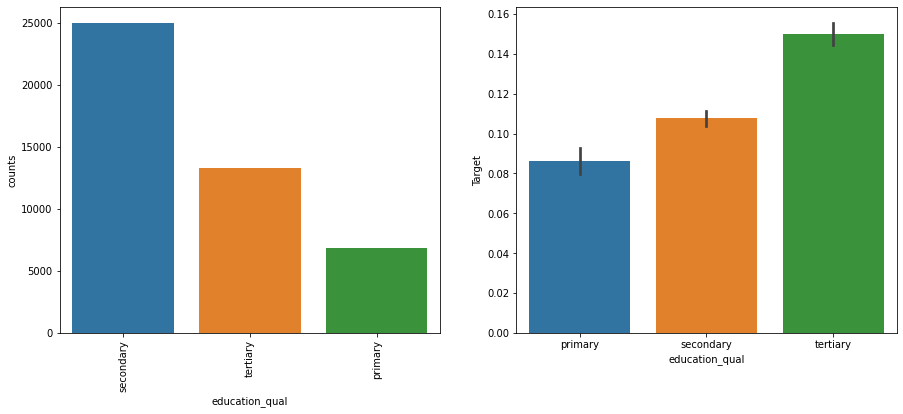

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,6))
df_e=pd.DataFrame(df.education_qual.value_counts()).sort_values('education_qual',ascending=False).reset_index()
df_e.rename(columns={'index':'education_qual','education_qual':'counts'},inplace=True)
bar=sns.barplot(x=df_e['education_qual'],y=df_e['counts'],data=df_e,ax = ax[0])
bar.tick_params(axis='x',rotation=90)

df.groupby('education_qual')['Target'].mean().sort_values(ascending=False)
bar=sns.barplot(x=df['education_qual'].sort_values(),y='Target',data=df,ax = ax[1])

<AxesSubplot:ylabel='education_qual'>

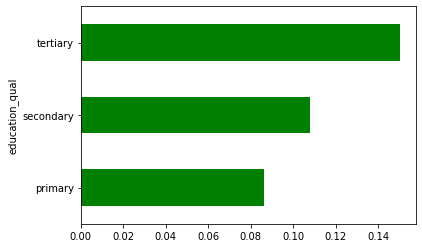

In [ ]:
df.groupby(['education_qual'])['Target'].mean().sort_values().plot(kind='barh',color='green')

In [ ]:
edu_qul={'secondary':2,'tertiary':1,'primary':0}
df['education_qual'].replace(edu_qul,inplace=True)

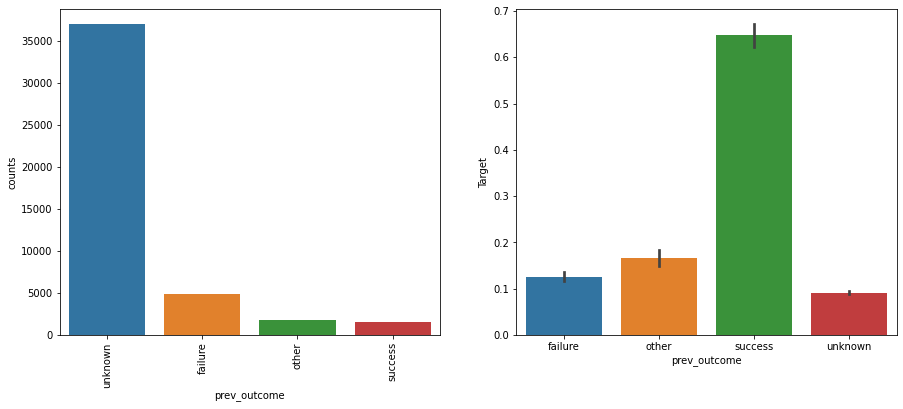

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,6))
df_e=pd.DataFrame(df.prev_outcome.value_counts()).sort_values('prev_outcome',ascending=False).reset_index()
df_e.rename(columns={'index':'prev_outcome','prev_outcome':'counts'},inplace=True)
bar=sns.barplot(x=df_e['prev_outcome'],y=df_e['counts'],data=df_e,ax = ax[0])
bar.tick_params(axis='x',rotation=90)

df.groupby('prev_outcome')['Target'].mean().sort_values(ascending=False)
bar=sns.barplot(x=df['prev_outcome'].sort_values(),y='Target',data=df,ax = ax[1])

<AxesSubplot:ylabel='prev_outcome'>

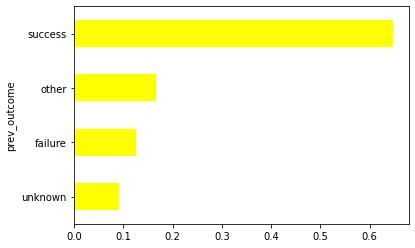

In [ ]:
df.groupby(['prev_outcome'])['Target'].mean().sort_values().plot(kind='barh',color='yellow')

In [ ]:
prev_outcome={'success':3,'other':2,'failure':1,'unknown':0}
df['prev_outcome'].replace(prev_outcome,inplace=True)

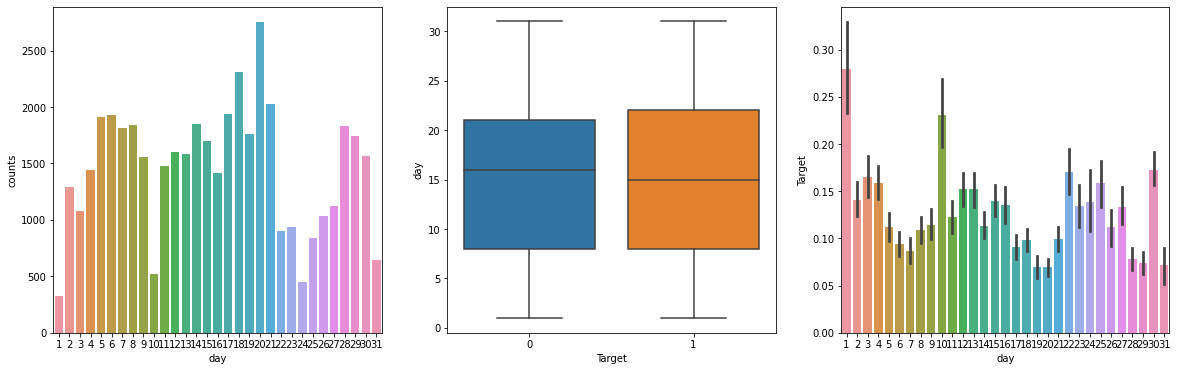

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,3,figsize=(20,6))
df_e=pd.DataFrame(df.day.value_counts()).sort_values('day',ascending=False).reset_index()
df_e.rename(columns={'index':'day','day':'counts'},inplace=True)
bar=sns.barplot(x=df_e['day'],y=df_e['counts'],data=df_e,ax = ax[0])


df.groupby('day')['Target'].mean().sort_values(ascending=False)
bar=sns.boxplot(x='Target',y=df['day'],data=df,ax= ax[1])
bar=sns.barplot(y='Target',x=df['day'],data=df,ax=ax[2])

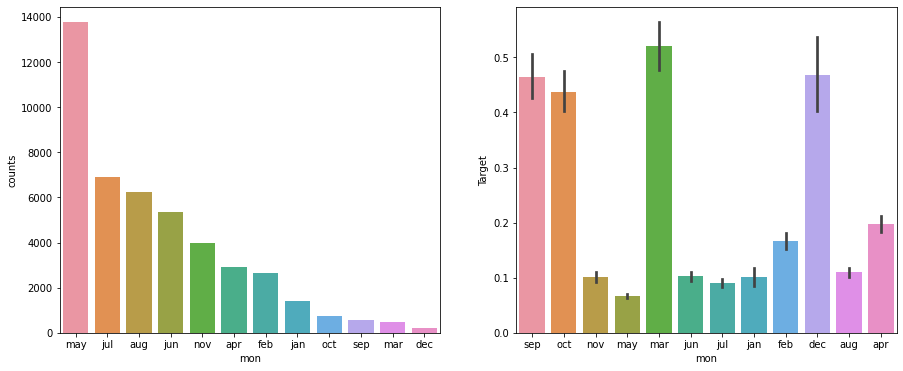

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,6))
df_e=pd.DataFrame(df.mon.value_counts()).sort_values('mon',ascending=False).reset_index()
df_e.rename(columns={'index':'mon','mon':'counts'},inplace=True)
bar=sns.barplot(x=df_e['mon'],y=df_e['counts'],data=df_e,ax = ax[0])

df.groupby('mon')['Target'].mean().sort_values(ascending=False)

bar=sns.barplot(x=df['mon'].sort_values(ascending=False),y='Target',data=df,ax = ax[1])

<AxesSubplot:ylabel='mon'>

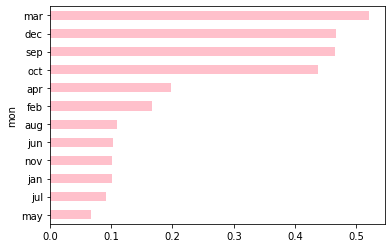

In [ ]:
df.groupby(['mon'])['Target'].mean().sort_values().plot(kind='barh',color='pink')

In [ ]:
mon={'jan':2,'feb':6,'mar':11,'apr':7,'may':0,'jun':4,'jul':1,'aug':5,'sep':9,'oct':8,'nov':3,'dec':10}
df['mon'].replace(mon,inplace=True)

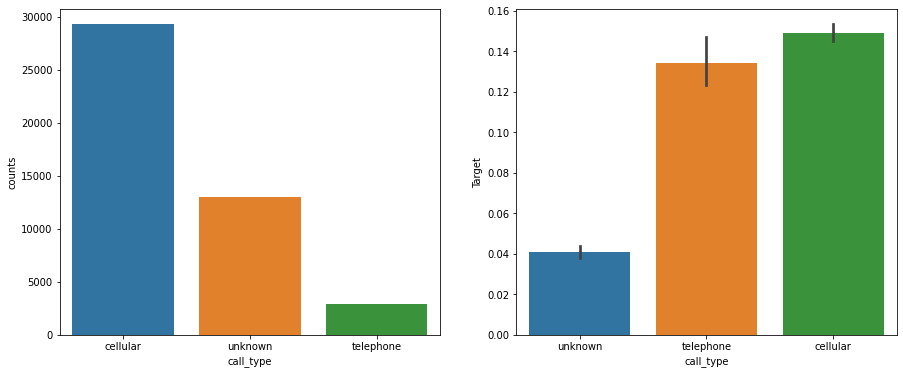

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,6))
df_e=pd.DataFrame(df.call_type.value_counts()).sort_values('call_type',ascending=False).reset_index()
df_e.rename(columns={'index':'call_type','call_type':'counts'},inplace=True)
bar=sns.barplot(x=df_e['call_type'],y=df_e['counts'],data=df_e,ax = ax[0])

df.groupby('call_type')['Target'].mean().sort_values(ascending=False)

bar=sns.barplot(x=df['call_type'].sort_values(ascending=False),y='Target',data=df,ax = ax[1])

<AxesSubplot:ylabel='call_type'>

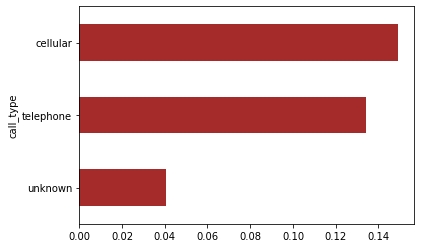

In [ ]:
df.groupby(['call_type'])['Target'].mean().sort_values().plot(kind='barh',color='brown')

In [ ]:
call_type={'cellular':2,'unknown':0,'telephone':1}
df['call_type'].replace(call_type,inplace=True)

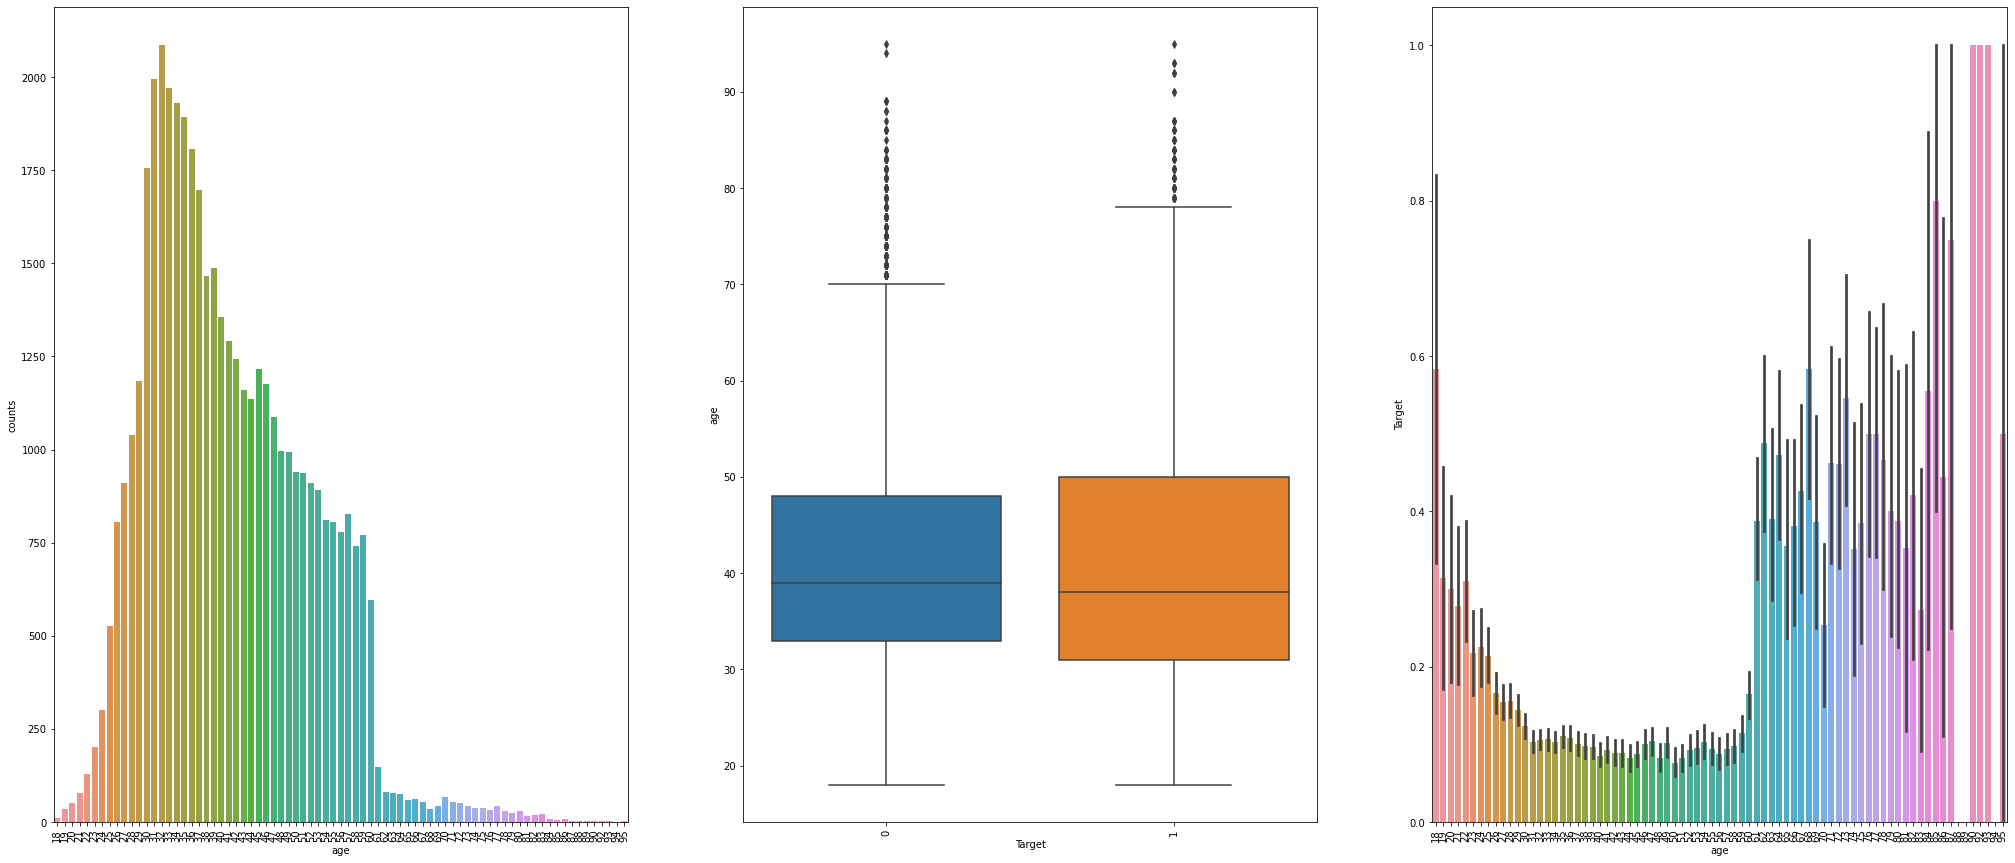

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,3,figsize=(35,15))
df_e=pd.DataFrame(df.age.value_counts()).sort_values('age',ascending=False).reset_index()
df_e.rename(columns={'index':'age','age':'counts'},inplace=True)
bar=sns.barplot(x=df_e['age'],y=df_e['counts'],data=df_e,ax = ax[0])
bar.tick_params(axis='x',rotation=90)

df.groupby('age')['Target'].mean().sort_values(ascending=False)
bar=sns.boxplot(x='Target',y=df['age'],data=df,ax= ax[1])
bar.tick_params(axis='x',rotation=90)
bar=sns.barplot(y='Target',x=df['age'],data=df,ax=ax[2])
bar.tick_params(axis='x',rotation=90)

In [ ]:
mapping={'yes':1,'no':0}
df['y'].replace(mapping,inplace=True)

In [ ]:
# # import the KNNimputer class
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=3)
# After_imputation = imputer.fit_transform(df['job'])

In [ ]:

df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58,7,0,1,0,5,0,261.000000,1.0,0,0,0
1,44,4,2,2,0,5,0,151.000000,1.0,0,0,0
2,33,1,0,2,0,5,0,76.000000,1.0,0,0,0
3,47,0,0,2,0,5,0,92.000000,1.0,0,0,0
4,33,0,2,2,0,5,0,198.000000,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,1,2,17,3,977.000000,3.0,0,1,1
45207,71,9,1,0,2,17,3,456.000000,2.0,0,1,1
45208,72,9,0,2,2,17,3,1030.746517,5.0,3,1,1
45209,57,0,0,2,1,17,3,508.000000,4.0,0,0,0


In [ ]:
df.drop(['Target'],axis=1,inplace=True)

In [ ]:
df1=df.copy()

In [ ]:
X=df1[['age', 'job', 'marital', 'education_qual', 'call_type','day', 'mon','dur', 'num_calls', 'prev_outcome']].values
y=df1['y'].values

In [ ]:
X


array([[5.80000000e+01, 7.00000000e+00, 0.00000000e+00, ...,
        2.61000000e+02, 1.00000000e+00, 0.00000000e+00],
       [4.40000000e+01, 4.00000000e+00, 2.00000000e+00, ...,
        1.51000000e+02, 1.00000000e+00, 0.00000000e+00],
       [3.30000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        7.60000000e+01, 1.00000000e+00, 0.00000000e+00],
       ...,
       [7.20000000e+01, 9.00000000e+00, 0.00000000e+00, ...,
        1.03074652e+03, 5.00000000e+00, 3.00000000e+00],
       [5.70000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        5.08000000e+02, 4.00000000e+00, 0.00000000e+00],
       [3.70000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        3.61000000e+02, 2.00000000e+00, 2.00000000e+00]])

In [ ]:
df1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,1,0,5,0,261.000000,1.0,0,0
1,44,4,2,2,0,5,0,151.000000,1.0,0,0
2,33,1,0,2,0,5,0,76.000000,1.0,0,0
3,47,0,0,2,0,5,0,92.000000,1.0,0,0
4,33,0,2,2,0,5,0,198.000000,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,1,2,17,3,977.000000,3.0,0,1
45207,71,9,1,0,2,17,3,456.000000,2.0,0,1
45208,72,9,0,2,2,17,3,1030.746517,5.0,3,1
45209,57,0,0,2,1,17,3,508.000000,4.0,0,0


In [ ]:
df.shape

(45211, 11)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=21)
print('X_train : ',X_train.shape,'\nX_test : ',X_test.shape,'\ny_train : ',y_train.shape, '\ny_test : ',y_test.shape  )

X_train :  (33908, 10) 
X_test :  (11303, 10) 
y_train :  (33908,) 
y_test :  (11303,)


In [ ]:
X_train

array([[ 48.        ,   0.        ,   0.        , ..., 238.        ,
          3.        ,   0.        ],
       [ 54.        ,   7.        ,   0.        , ..., 151.        ,
          2.        ,   0.        ],
       [ 37.        ,   4.        ,   2.        , ..., 576.        ,
          2.        ,   0.        ],
       ...,
       [ 30.        ,   8.        ,   2.        , ..., 372.        ,
         12.05790331,   0.        ],
       [ 28.        ,   4.        ,   2.        , ..., 108.        ,
          5.        ,   0.        ],
       [ 52.        ,   4.        ,   0.        , ..., 292.        ,
          2.        ,   0.        ]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)

In [ ]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=2)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (59838, 10)
After OverSampling, the shape of train_y: (59838,) 

After OverSampling, counts of label '1': 29919
After OverSampling, counts of label '0': 29919


In [ ]:
df1.shape

(45211, 11)

In [ ]:
len(X_train),len(y_train)

(33908, 33908)

In [ ]:
from imblearn.combine import SMOTEENN

smt=SMOTEENN(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(X_train,y_train)

In [ ]:
len(x_smt),len(y_smt)

(51197, 51197)

In [ ]:
df.shape

(45211, 11)

In [ ]:
df_bal=pd.DataFrame(x_smt,columns=df.columns[:-1])


In [ ]:
df_bal['y']=y_smt

In [ ]:
df_bal

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,48.000000,0.000000,0.000000,2.0,0.0,20.000000,4.000000,238.000000,3.000000,0.0,0
1,54.000000,7.000000,0.000000,1.0,2.0,19.000000,3.000000,151.000000,2.000000,0.0,0
2,31.000000,0.000000,0.000000,0.0,0.0,13.000000,0.000000,241.000000,2.000000,0.0,0
3,32.000000,4.000000,2.000000,2.0,2.0,22.000000,5.000000,210.000000,2.000000,0.0,0
4,59.000000,6.000000,1.000000,2.0,0.0,16.000000,0.000000,204.000000,1.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
51192,30.000000,7.000000,2.000000,1.0,2.0,12.806875,7.772502,1030.746517,1.193125,0.0,1
51193,30.641437,3.679281,1.358563,2.0,2.0,10.924311,4.754970,743.320719,1.000000,0.0,1
51194,24.822651,3.177349,0.000000,2.0,2.0,22.935903,1.709398,458.354699,7.758554,0.0,1
51195,29.798000,5.697001,2.000000,2.0,2.0,9.252500,5.949500,123.101000,1.000000,0.0,1


In [ ]:
df_bal['y'].mean()

0.5623571693653925

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(x_smt)
X_test_scaled=sc.transform(X_test)

In [ ]:
X_train_scaled
 

array([[ 0.57546802, -1.63800207, -0.88631936, ..., -0.40223866,
         0.29029016, -0.58820308],
       [ 1.08966045,  0.82714707, -0.88631936, ..., -0.70234894,
        -0.20163752, -0.58820308],
       [-0.88141053, -1.63800207, -0.88631936, ..., -0.39189003,
        -0.20163752, -0.58820308],
       ...,
       [-1.41080159, -0.51905345, -0.88631936, ...,  0.35788443,
         2.63115441, -0.58820308],
       [-0.98442039,  0.36827735,  1.46630644, ..., -0.79858775,
        -0.69356519, -0.58820308],
       [-0.45796891, -1.63800207, -0.88631936, ...,  2.33237483,
        -0.02763835, -0.58820308]])

In [ ]:
X_test_scaled

array([[-0.62431432,  0.47498291, -0.88631936, ..., -0.80928478,
         0.29029016, -0.58820308],
       [-1.05280801, -1.63800207,  1.46630644, ..., -0.57471583,
        -0.69356519,  0.52111412],
       [ 0.06127559,  0.82714707,  1.46630644, ..., -0.05383478,
        -0.69356519, -0.58820308],
       ...,
       [ 0.23267307, -1.63800207, -0.88631936, ..., -1.1128446 ,
        -0.20163752,  1.63043132],
       [-1.22420549,  0.47498291,  1.46630644, ..., -0.91622063,
        -0.20163752, -0.58820308],
       [-0.28151936, -1.63800207, -0.88631936, ..., -0.62990853,
        -0.69356519, -0.58820308]])

In [ ]:
y_smt[29]

0

In [ ]:
X_train_scaled[29]

array([-0.71001305, -1.63800207, -0.88631936,  0.906059  , -1.97551833,
        0.8938224 , -1.18482687, -0.1745688 , -0.20163752, -0.58820308])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report,accuracy_score

model=LogisticRegression()
model.fit(X_train_scaled,y_smt)
model.score(X_test_scaled,y_test)
log=roc_auc_score(y_test,model.predict_proba(X_test_scaled)[:,1])
print(log)

0.8965144302862986


In [ ]:
log

0.8965144302862986

In [ ]:
print(model.intercept_)
print(model.coef_)

[0.98151088]
[[ 0.0806325   0.60988572  0.31818505  0.03785854  0.48879791  0.02144365
   1.20819312  3.45404377 -0.5328553   0.97374636]]


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
model.predict([[ 0.38757435,  1.09944105, -0.36037255,  0.81277983,  0.5004813 ,
        0.22575749, -0.4247379 , -0.70381601,  0.41533437,  0.71290398]])


array([0])

In [ ]:
score=model.score(X_test,y_test)
print(score)
print(score*100,'%')

0.11501371317349376
11.501371317349376 %


In [ ]:
yhat=model.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report,accuracy_score

In [ ]:
confusion_matrix(y_test,yhat)

array([[    0, 10003],
       [    0,  1300]])

In [ ]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10003
           1       0.12      1.00      0.21      1300

    accuracy                           0.12     11303
   macro avg       0.06      0.50      0.10     11303
weighted avg       0.01      0.12      0.02     11303



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(y_test,yhat))

0.11501371317349376


In [ ]:
roc_auc_score(y_test, yhat, average=None)

0.5

KNN Classifier Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
k=10
mean_acc=np.zeros((k-1))
std_acc=np.zeros((k-1))
ConfustionMx = [];
for n in range(1,k):
  neigh=KNeighborsClassifier(n_neighbors=n,).fit(X_train_scaled,y_smt)
  yhat=neigh.predict(X_test_scaled)
 
  mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
  std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print(mean_acc)
print(std_acc)  
print()
score=model.score(X_test_scaled,y_test)
print('yhat:',yhat)
print(score)
print(score*100,'%')
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
print()
print('Confusion Matrix: \n',confusion_matrix(y_test,yhat))
print()
print('classification_report :\n',classification_report(y_test,yhat))
print()
log=roc_auc_score(y_test,neigh.predict_proba(X_test_scaled)[:,1], average=None)
print(log)

[0.8449969  0.85729452 0.82721401 0.84269663 0.82022472 0.833584
 0.81597806 0.82765637 0.81473945]
[0.00340409 0.00328994 0.00355604 0.00342458 0.00361189 0.00350328
 0.00364483 0.00355243 0.0036543 ]

yhat: [0 0 0 ... 0 1 0]
0.7730690966999911
77.30690966999911 %
The best accuracy was with 0.8572945235778112 with k= 2

Confusion Matrix: 
 [[8132 1871]
 [ 223 1077]]

classification_report :
               precision    recall  f1-score   support

           0       0.97      0.81      0.89     10003
           1       0.37      0.83      0.51      1300

    accuracy                           0.81     11303
   macro avg       0.67      0.82      0.70     11303
weighted avg       0.90      0.81      0.84     11303


0.8808484377763595


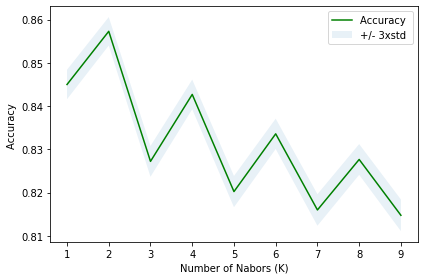

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,k),mean_acc,'g')
plt.fill_between(range(1,k),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
k=2

neigh=KNeighborsClassifier(n_neighbors=100,weights='uniform',algorithm='auto', p = 10,metric='euclidean').fit(X_train_scaled,y_smt)
yhat=neigh.predict(X_test_scaled)

print()
score=model.score(X_test_scaled,y_test)
print(score)
print(score*100,'%')

print()
print('Confusion Matrix: \n',confusion_matrix(y_test,yhat))
print()
print('classification_report :\n',classification_report(y_test,yhat))
print()
knn=roc_auc_score(y_test, neigh.predict_proba(X_test_scaled)[:,1], average=None)
print(knn)


0.7730690966999911
77.30690966999911 %

Confusion Matrix: 
 [[8017 1986]
 [ 188 1112]]

classification_report :
               precision    recall  f1-score   support

           0       0.98      0.80      0.88     10003
           1       0.36      0.86      0.51      1300

    accuracy                           0.81     11303
   macro avg       0.67      0.83      0.69     11303
weighted avg       0.91      0.81      0.84     11303


0.9015909073431817


SVM

In [ ]:
from sklearn import svm
import itertools
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_scaled, y_smt)
yhat = clf.predict(X_test_scaled)
# yhat[:5]

# clf.score(X_test, y_test)
# y_pred = clf.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y_test,yhat))
print()
print('classification_report :\n',classification_report(y_test,yhat))
print()
svm=roc_auc_score(y_test,clf.predict(X_test_scaled))
print(svm)

Confusion Matrix: 
 [[7992 2011]
 [ 155 1145]]

classification_report :
               precision    recall  f1-score   support

           0       0.98      0.80      0.88     10003
           1       0.36      0.88      0.51      1300

    accuracy                           0.81     11303
   macro avg       0.67      0.84      0.70     11303
weighted avg       0.91      0.81      0.84     11303


0.8398647713378294


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion="gini",splitter='best',max_depth=8)
model.fit(X_train_scaled, y_smt)

yhat = model.predict(X_test_scaled)
# yhat[:5]

# clf.score(X_test, y_test)
# y_pred = clf.predict(X_test)

print('Confusion Matrix: \n',confusion_matrix(y_test,yhat))
print()
print('classification_report :\n',classification_report(y_test,yhat))
print()
dtc=roc_auc_score(y_test,model.predict_proba(X_test_scaled)[:,1], average=None)
print(dtc)

Confusion Matrix: 
 [[8140 1863]
 [ 218 1082]]

classification_report :
               precision    recall  f1-score   support

           0       0.97      0.81      0.89     10003
           1       0.37      0.83      0.51      1300

    accuracy                           0.82     11303
   macro avg       0.67      0.82      0.70     11303
weighted avg       0.90      0.82      0.84     11303


0.8806520351586833


Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators= 150, criterion="gini",max_depth=7,max_features='auto')  
model.fit(X_train_scaled, y_smt)

yhat = model.predict(X_test_scaled)

print('Confusion Matrix: \n',confusion_matrix(y_test,yhat))
print()
print('classification_report :\n',classification_report(y_test,yhat))
print()
print(yhat)
print('ROC_ AUC_ Score: ',roc_auc_score(y_test,model.predict_proba(X_test_scaled)[:,1], average=None))
print(model.predict_proba(X_test_scaled))
rfc=roc_auc_score(y_test,model.predict_proba(X_test_scaled)[:,1], average=None)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Confusion Matrix: 
 [[8172 1831]
 [ 189 1111]]

classification_report :
               precision    recall  f1-score   support

           0       0.98      0.82      0.89     10003
           1       0.38      0.85      0.52      1300

    accuracy                           0.82     11303
   macro avg       0.68      0.84      0.71     11303
weighted avg       0.91      0.82      0.85     11303


[0 0 0 ... 0 0 0]
ROC_ AUC_ Score:  0.9023356070102047
[[0.9861463  0.0138537 ]
 [0.81449821 0.18550179]
 [0.95609883 0.04390117]
 ...
 [0.91308339 0.08691661]
 [0.82000419 0.17999581]
 [0.98300369 0.01699631]]


In [ ]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train_scaled, y_smt)  

y_pred = classifier.predict(X_test_scaled)  
print('Confusion Matrix: \n',confusion_matrix(y_test,yhat))
print()
print('classification_report :\n',classification_report(y_test,yhat))
print()
print('ROC_ AUC_ Score: ',roc_auc_score(y_test, y_pred, average=None))
print('ROC_ AUC_ Score: ',roc_auc_score(y_test, classifier.predict_proba(X_test_scaled)[:,1], average=None))
gnb=roc_auc_score(y_test, classifier.predict_proba(X_test_scaled)[:,1], average=None)

Confusion Matrix: 
 [[8172 1831]
 [ 189 1111]]

classification_report :
               precision    recall  f1-score   support

           0       0.98      0.82      0.89     10003
           1       0.38      0.85      0.52      1300

    accuracy                           0.82     11303
   macro avg       0.68      0.84      0.71     11303
weighted avg       0.91      0.82      0.85     11303


ROC_ AUC_ Score:  0.8077301040457093
ROC_ AUC_ Score:  0.8828752143587693


In [ ]:
import xgboost as xgb
x=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.75,1]

xg=xgb.XGBClassifier(learning_rate=0.3,n_estimators=100,verbosity=0)
xg.fit(X_train_scaled,y_smt)
  
xg.score(X_test_scaled,y_test)
yhat=xg.predict(X_test_scaled)
print('Confusion Matrix: \n',confusion_matrix(y_test,yhat))
print()
print('classification_report :\n',classification_report(y_test,yhat))
print()
print('ROC_ AUC_ Score: ',roc_auc_score(y_test, xg.predict_proba(X_test_scaled)[:,1], average=None))
xgb=roc_auc_score(y_test, xg.predict_proba(X_test_scaled)[:,1], average=None)
print(xgb)

Confusion Matrix: 
 [[8921 1082]
 [ 293 1007]]

classification_report :
               precision    recall  f1-score   support

           0       0.97      0.89      0.93     10003
           1       0.48      0.77      0.59      1300

    accuracy                           0.88     11303
   macro avg       0.73      0.83      0.76     11303
weighted avg       0.91      0.88      0.89     11303


ROC_ AUC_ Score:  0.9239359730542376
0.9239359730542376


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn import tree
import xgboost as xgb

import numpy as np

m1=LogisticRegression()
m2=KNeighborsClassifier(n_neighbors=100,weights='uniform',algorithm='auto', p = 10,metric='euclidean')

m4=DecisionTreeClassifier(criterion="gini",splitter='best',max_depth=8)
m5=RandomForestClassifier(n_estimators= 150, criterion="gini",max_depth=7,max_features='auto')
m6=GaussianNB()  
m7=xgb.XGBClassifier(learning_rate=0.3,n_estimators=100,verbosity=0)
m=VotingClassifier(estimators=[('lr',m1),('knn',m2),('dt',m4),('rtc',m5),('GNB',m6),("xg",m7)],voting='soft')

In [ ]:
m.fit(X_train_scaled,y_smt)
  
# m.score(X_test_scaled,y_test)
yhat=m.predict(X_test_scaled)
v=roc_auc_score(y_test,m.predict_proba(X_test_scaled)[:,1])

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
df_val=pd.DataFrame({"Model":['Logistic Regression','KNeighbors','Decision Tree','Random Forest',"Gaussian",'xg','Voting'],'AUROC':[log,knn,dtc,rfc,gnb,xgb,v]})

In [ ]:
df_val

,Model,AUROC
0,Logistic Regression,0.880848
1,KNeighbors,0.901591
2,Decision Tree,0.880652
3,Random Forest,0.902336
4,Gaussian,0.882875
5,xg,<module 'xgboost' from '/usr/local/lib/python3...
6,Voting,0.913868


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


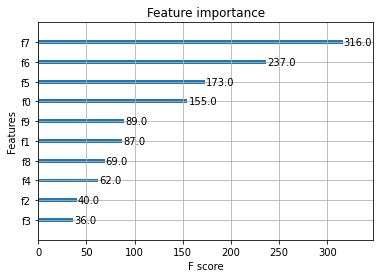

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(xg)
plt.show()